In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df["experience"].fillna("zero",inplace=True)
df["test_score(out of 10)"].fillna(0,inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,0.0,7,72000
7,eleven,7.0,8,80000


In [7]:
num={
    "zero":0,
    'one':1,
    "two": 2,
    "three":3,
    "four": 4,
    'five':5,
    'six':6,
    'seven':7,
    'eight':8,
    'nine':9,
    'ten':10,
    'eleven':11
}
df['experience']=[num[i] for i in df['experience']]
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,0.0,7,72000
7,11,7.0,8,80000


In [9]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['salary($)'])
y=df['salary($)']
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2)

In [14]:
model= linear_model.LinearRegression()
model.fit(xtr,ytr)

LinearRegression()

In [18]:
yp=model.predict(xte)
yp

array([60423.27093422, 51076.31115834])

In [23]:
mse=mean_squared_error(yte,yp)
r=r2_score(yte,yp)
print(mse,r)
model.score(xte,yp)

11052447.32554776 0.8035120475458176


1.0

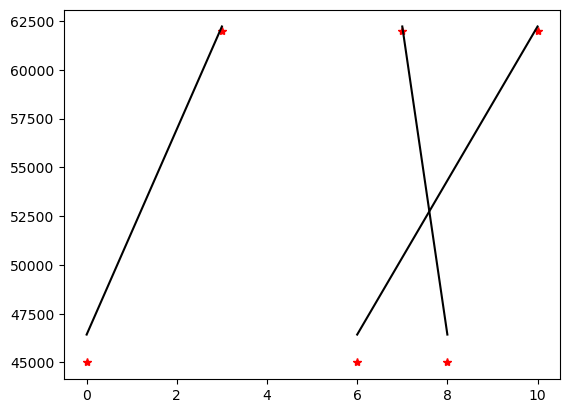

In [43]:
plt.plot(x,y="*",color="red",ls="")
plt.plot(xte,yt,color="black")
plt.show()

In [44]:
import pickle

In [46]:
with open("model_pickle",'wb')as f:
    pickle.dump(model,f)

In [48]:
X_test

,experience,test_score(out of 10),interview_score(out of 10)
1,0,8.0,6
5,3,7.0,10
